In [ ]:
# known viral contigs
with open('/content/drive/MyDrive/KGI Internship/viral pred/GoodContigs.txt', 'r') as f:
    good_contigs = f.readlines()

i = 0
while i < len(good_contigs):
    good_contigs[i] = good_contigs[i].strip()
    i += 1

contig_dict = {}
cluster_dict = {}

# k:v = contig : representative genes of clusters it appears in
with open('/content/drive/MyDrive/KGI Internship/viral pred/contig_dict.txt', 'r') as f:
    contig_lines = f.readlines()

i = 0
while i < len(contig_lines):
    contig_lines[i] = contig_lines[i].strip()[:-1]
    i += 1

# k:v = representative gene : genes in same cluster
with open('/content/drive/MyDrive/KGI Internship/viral pred/cluster_dictionary.txt', 'r') as f:
    cluster_lines = f.readlines()

i = 0
while i < len(cluster_lines):
    cluster_lines[i] = cluster_lines[i].strip()[:-1]
    i += 1


for line in contig_lines:
    contig_dict[line[:line.index(':')]] = list(line[line.index(':') + 2:].split(','))

for line in cluster_lines:
    cluster_dict[line[:line.index(':')]] = list(line[line.index(':') + 2:].split(','))

contig_to_gene = {}
with open('/content/drive/MyDrive/KGI Internship/viral pred/prodigal_pred_proteins_real.txt', 'r') as f:
  lines = f.readlines()
print(lines)
for line in lines:
  try:
    if line[1:line.index('_')] in contig_to_gene.keys():
      contig_to_gene[line[1:line.index('_')]].append(line[1:line.index(' ')])
    else:
      contig_to_gene[line[1:line.index('_')]] = [line[1:line.index(' ')]]
  except ValueError as e:
    print(e)
    print(line)
    continue
print('Dict: ' + str(contig_to_gene))

# k:v = gene : representative gene of cluster it's in
gene_dict = {}
for cluster in cluster_dict.keys():
  for gene in cluster_dict[cluster]:
    gene_dict[gene] = cluster
print(list(gene_dict.items())[:10])



In [ ]:
with open('/content/drive/MyDrive/KGI Internship/viral pred/Structural_Hits.txt', 'r') as f:
  structural_hits = f.read().splitlines()
print(len(structural_hits))
print(structural_hits[:10])
structural_pred_contigs = list(set([i[:i.index('_')] for i in structural_hits]))
print(len(structural_pred_contigs))
print(structural_pred_contigs[:10])

In [ ]:
num_good_genes = []
for i in good_contigs:
  if i in contig_to_gene.keys():
    num_good_genes.append(len(contig_to_gene[i]))


num_genes = [len(contig_to_gene[i]) for i in structural_pred_contigs]

print(len(num_good_genes))
print(len(good_contigs))
print(sum(num_good_genes))

print('known genes:', sum(num_good_genes))
print('pred genes:', sum(num_genes))

print('all genes:', sum([len(i) for i in contig_to_gene.values()]))

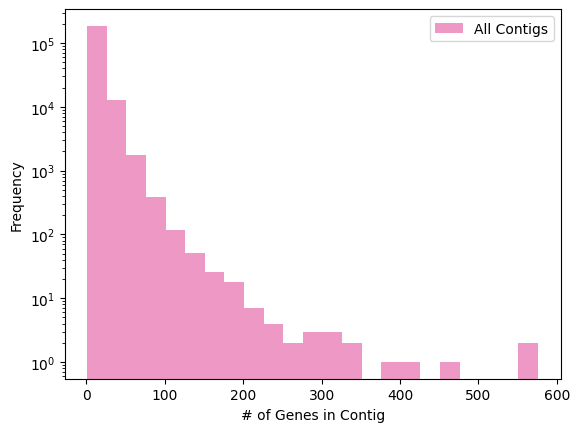

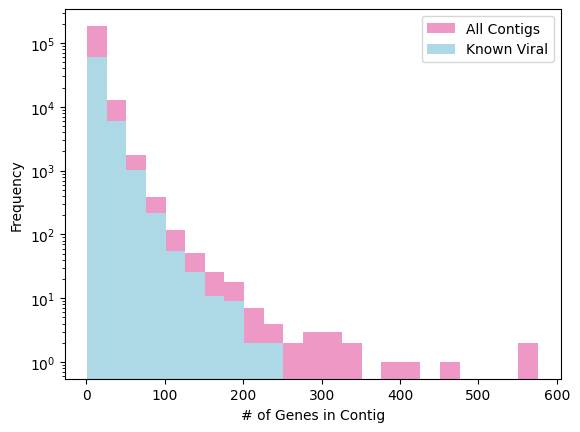

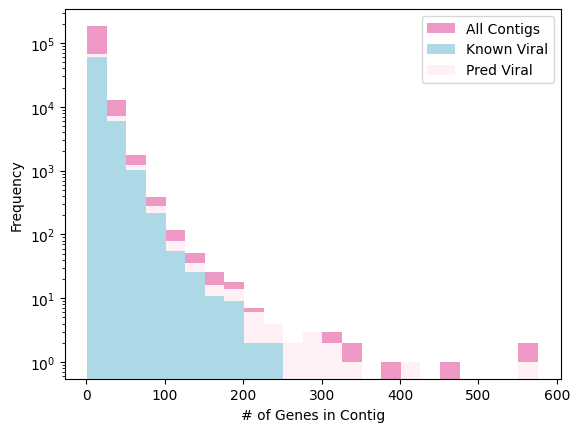

In [5]:
from matplotlib import pyplot as plt

plt.figure()

first_opacity, second_op, third_op = 0.4, 0.6, 1.0

first = [len(i) for i in contig_to_gene.values()]
binwidth=25

plt.hist(first, label='All Contigs', color='#D60270', alpha=first_opacity, bins=range(min(first), max(first) + binwidth, binwidth))
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()

plt.hist(first, label='All Contigs', color='#D60270', alpha=first_opacity, bins=range(min(first), max(first) + binwidth, binwidth))
plt.hist(num_good_genes, label='Known Viral', color='lightblue', bins=range(min(first), max(first) + binwidth, binwidth))
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()

plt.hist(first, label='All Contigs', color='#D60270', alpha=first_opacity, bins=range(min(first), max(first) + binwidth, binwidth))
plt.hist([num_good_genes, num_genes], stacked=True, label=['Known Viral', 'Pred Viral'], color=['lightblue', 'lavenderblush'], bins=range(min(first), max(first) + binwidth, binwidth))
plt.xlabel('# of Genes in Contig')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

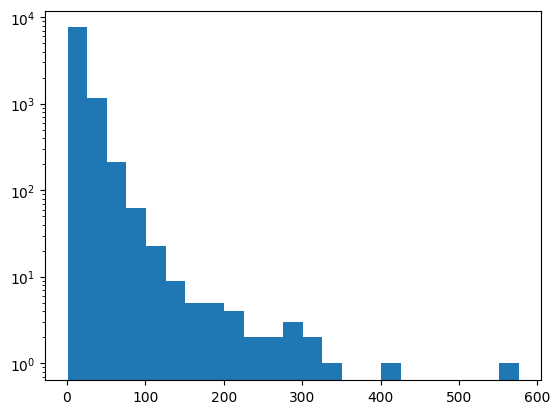

In [8]:
plt.hist(num_genes, bins=range(min(first), max(first) + binwidth, binwidth))
plt.yscale('log')
plt.show()